<a href="https://colab.research.google.com/github/Maisho20/Machine-Learning/blob/main/UTS/UTS_Clustering_Image_Segmentation_Sabbaha_Naufal_Erwanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentasi Gambar dengan Clustering

#### Nama Kelompok


1. Abdullah Kahafabi      ()
2. Dandy Wahyu Syahputra  (2141720002)
3. Jauhar Maulana A'la    (2141720186)
4. Naufal Falah Wafiuddin (2141720129)
5. Sabbaha Naufal Erwanda (2141720221)



# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

# Jawaban UTS

**Persiapan Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import liblary
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.cluster import MiniBatchKMeans
import glob

In [3]:
# Load Gambar
images = []
for img in glob.glob("/content/drive/MyDrive/Colab Notebooks/Mechine learning/UTS/Dummy/*"):
    n= cv2.imread(img)
    images.append(n)

# Memilih data ke 21 sampai 25
selected_images = images[20:25]

> Kode diatas ini digunakan untuk load data dari folder dalam google drive dan memilih data ke 21 sampai data ke 25 dalam dataset google drive

**Proses data gambar**

In [4]:
def scale_data(img):
    h, w, ch= img.shape
    data = img / 255.0
    data = data.reshape(h * w, ch)
    return data

> Baris kode diatas merupakan baris kode untuk mengatur scale atau ukuran dari sebuah citra agar memiliki ukuran yang sama dengan cara Mengambil dimensi gambar, lalu membagi nilai piksel gambar dengan 255 untuk mengubah rentang nilai piksel dari `[0, 255]` menjadi `[0, 1]` dan mengubah bentuk data gambar menjadi data dua dimensi

**Segmentasi Warna**

In [5]:
def plot_pixels_3d(data, title, colors=None, N=10000, ax=None):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    # Menambahkan label pada sumbu x, y, dan z
    ax.scatter(R, G, B, c=colors, marker='.')
    ax.set_xlabel('R')
    ax.set_ylabel('G')
    ax.set_zlabel('B')
    ax.set_title(title, size=14)

> Pada baris kode diatas melakukan pemerikasaan untuk membuat plot 3D menggunakan data citra yang telah diubah skalanya

**Membandingkan gambar original dengan gambar segmentasi**

In [6]:
def img_comparison(original, new_colors):
    new_plate = new_colors.reshape(original.shape) # Mengubah bentuk data new_colors menjadi bentuk yang sama dengan data original
    # Membuat sebuah plot gambar dengan menggunakan data original dan new_colors
    fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(original)
    ax[0].set_title('Original Image', size=16) # Menambahkan judul pada gambar
    ax[1].imshow(new_plate)
    ax[1].set_title('2-color Image', size=16); # Menambahkan judul pada gambar

> Baris kode diatas digunakan untuk membandingkan gambar asli dengan gambar hasil kmeans clustering

**Penerapan Algoritma Kmeans**

In [7]:
def kmeans_cluster(original):
    data = scale_data(original) # mempersiapkan data gambar sebelum dilakukan kmeans clustering
    kmeans = MiniBatchKMeans(2,n_init=3) # Melakukan kmeans clustering pada data gambar
    kmeans.fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'projection': '3d'}) # Membuat sebuah gambar yang menampilkan dua subplot (grafik sisi-sisi)

    # fungsi untuk subplot pertama
    plot_pixels_3d(data, "16 million possible colors", ax=ax1)

    # fungsi untuk subplot kedua
    plot_pixels_3d(data, "2 colors", colors=new_colors, ax=ax2)
    plt.show()
    img_comparison(original, new_colors)

> Baris program diatas digunakan untuk melakukan kmeans clustering pada setiap gambar dalam daftar yang telah dimuat

**Tampilan perbedaan 16 juta kemungkinan warna sebelum dan setelah segmentasi**

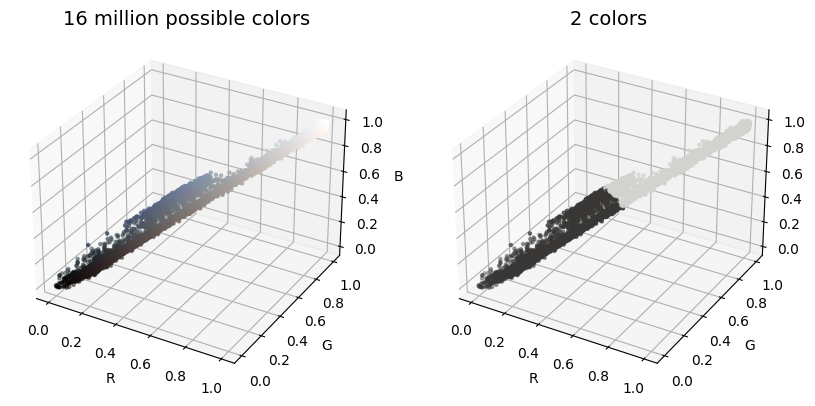

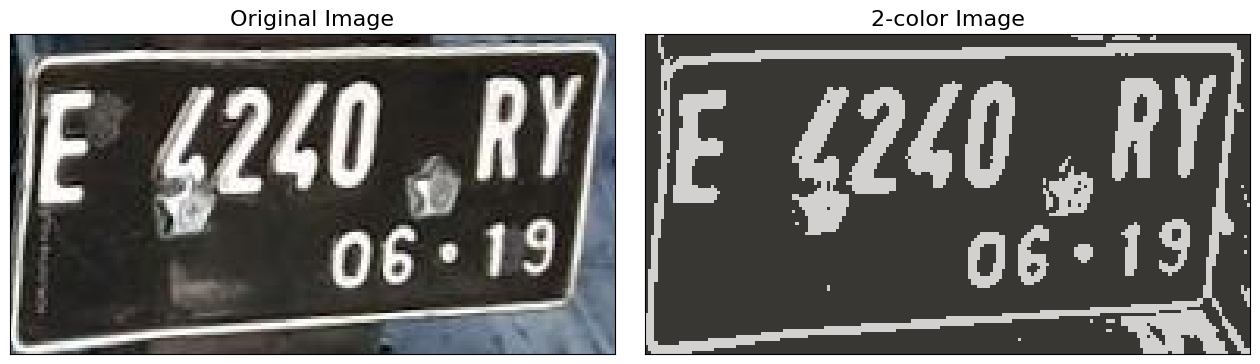

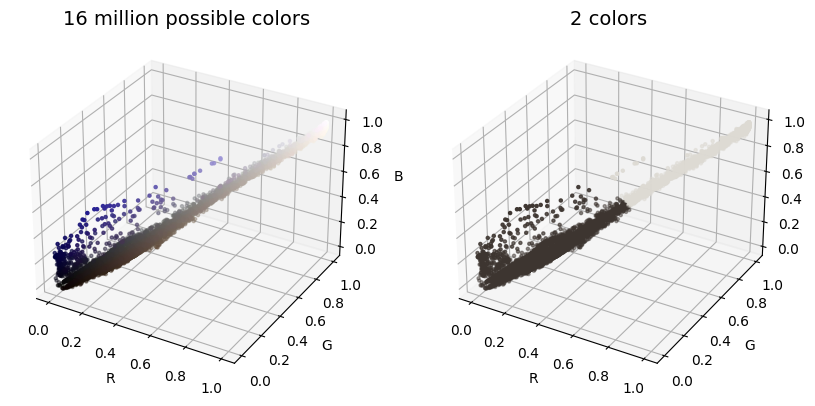

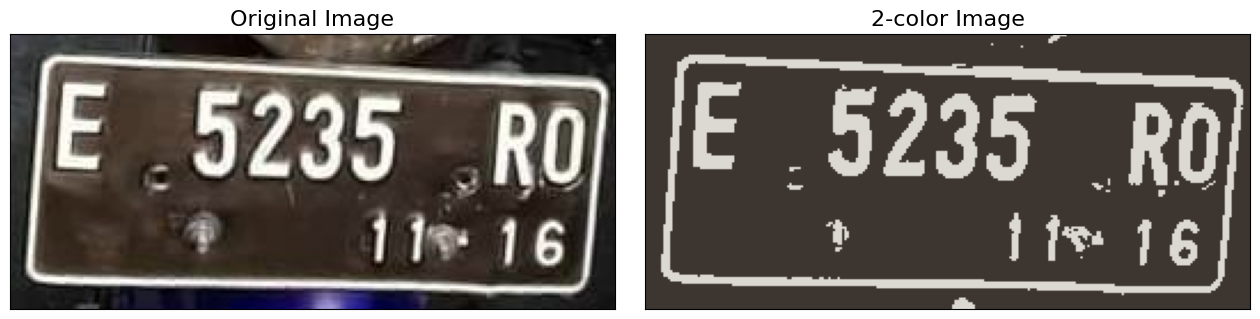

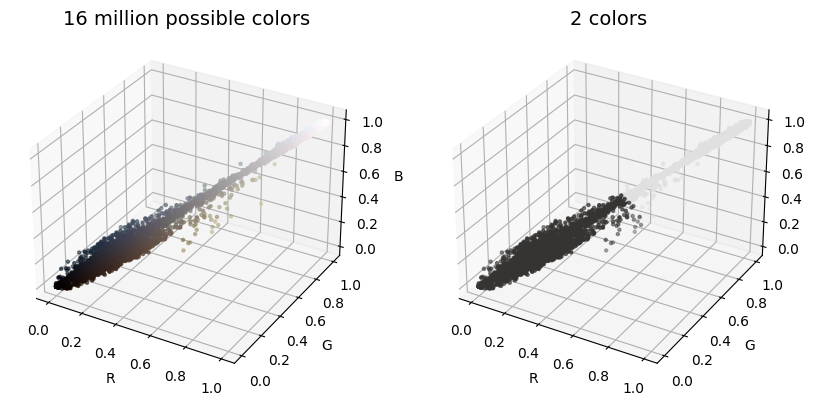

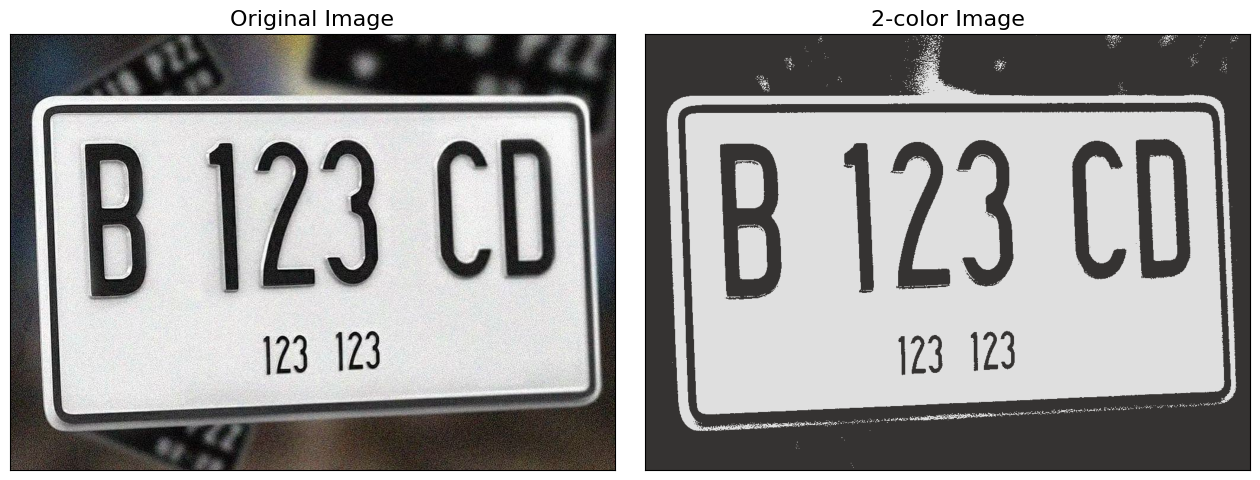

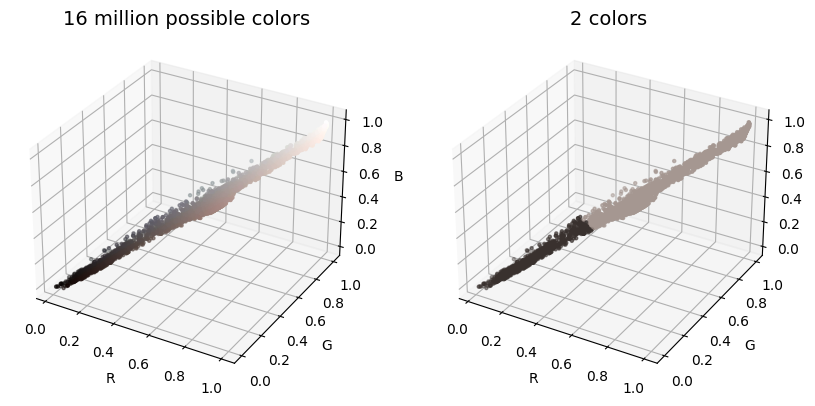

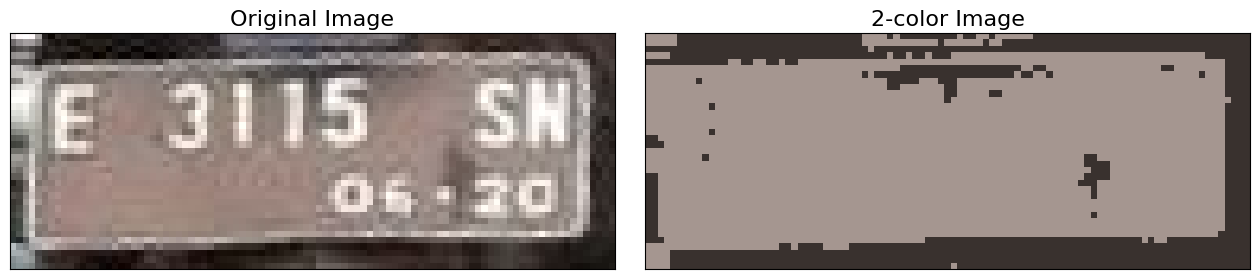

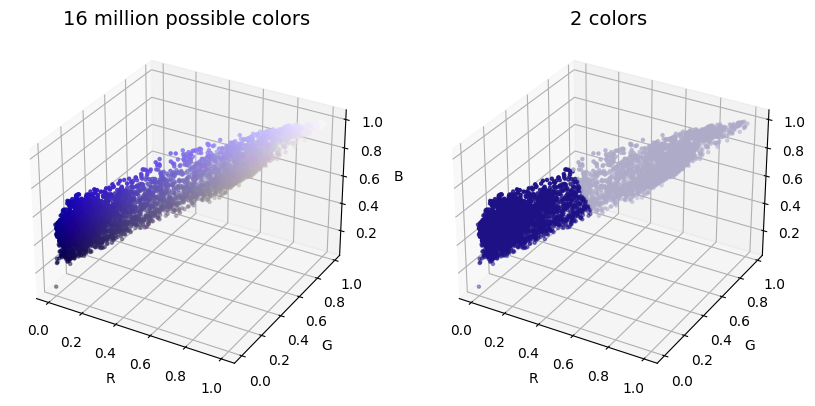

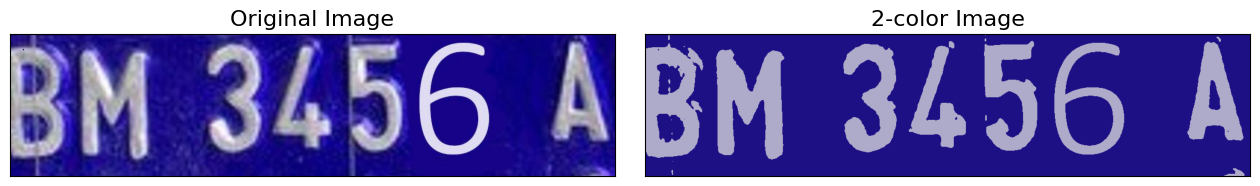

In [8]:
for i in range(20, 25):
    kmeans_cluster(images[i])

> Pada baris kode yang terakhir digunakan untuk menampilkan semua visualisasi yang telah di proses dan di plot